In [122]:
import pandas as pd 

In [123]:
# the value in the data are in fahrenheit ---------------------------------------
df = pd.read_csv(r'C:\Users\vicky\OneDrive\Desktop\New ML Project sem 6\try\mumbai_temp_1973.csv', index_col = 'DATE')

In [124]:
df.head()

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1973-01-01,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,22.8,NaN,NaN
1973-01-02,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,24.7,NaN,NaN
1973-01-03,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,24.0,NaN,NaN
1973-01-04,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,24.5,NaN,NaN
1973-01-05,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,26.0,30.0,18.0


In [125]:
df1 = df[["PRCP", "TMIN", "TMAX"]]

In [126]:
df1.columns = ["precip", "temp_min", "temp_max"]

In [127]:
df1.apply(pd.isnull).sum()/df1.shape[0]

precip      0.352067
temp_min    0.229609
temp_max    0.273184
dtype: float64

In [128]:
df1[pd.isnull(df1["precip"])]

,precip,temp_min,temp_max
DATE,,,
1973-01-01,NaN,NaN,NaN
1973-01-02,NaN,NaN,NaN
1973-01-03,NaN,NaN,NaN
1973-01-04,NaN,NaN,NaN
1973-01-05,NaN,18.0,30.0
...,...,...,...
2022-03-26,NaN,25.0,NaN
2022-03-27,NaN,24.0,NaN
2022-03-28,NaN,24.1,NaN


In [129]:
df1["precip"].value_counts()

0.0      7160
2.0       269
1.0       255
3.0       241
0.3       206
         ... 
67.3        1
91.7        1
79.8        1
56.6        1
230.1       1
Name: precip, Length: 391, dtype: int64

In [130]:
df1["precip"] = df1["precip"].fillna(0)

C:\Users\vicky\AppData\Local\Temp/ipykernel_12564/3138647391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["precip"] = df1["precip"].fillna(0)


In [131]:
df1[pd.isnull(df1["temp_max"])]

,precip,temp_min,temp_max
DATE,,,
1973-01-01,0.0,NaN,NaN
1973-01-02,0.0,NaN,NaN
1973-01-03,0.0,NaN,NaN
1973-01-04,0.0,NaN,NaN
1973-01-09,0.0,13.0,NaN
...,...,...,...
2022-03-26,0.0,25.0,NaN
2022-03-27,0.0,24.0,NaN
2022-03-28,0.0,24.1,NaN


In [132]:
df1 = df1.fillna(method= "ffill")

In [133]:
df1.apply(pd.isnull).sum()/df1.shape[0]

precip      0.000000
temp_min    0.000223
temp_max    0.000223
dtype: float64

In [134]:
df1.dtypes

precip      float64
temp_min    float64
temp_max    float64
dtype: object

In [135]:
df1.index

Index(['1973-01-01', '1973-01-02', '1973-01-03', '1973-01-04', '1973-01-05',
       '1973-01-06', '1973-01-07', '1973-01-08', '1973-01-09', '1973-01-10',
       ...
       '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
       '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30'],
      dtype='object', name='DATE', length=17900)

In [136]:
df1[pd.isnull(df1["temp_max"])]

,precip,temp_min,temp_max
DATE,,,
1973-01-01,0.0,NaN,NaN
1973-01-02,0.0,NaN,NaN
1973-01-03,0.0,NaN,NaN
1973-01-04,0.0,NaN,NaN


In [137]:
df1.index = pd.to_datetime(df1.index)

In [138]:
df1.index

DatetimeIndex(['1973-01-01', '1973-01-02', '1973-01-03', '1973-01-04',
               '1973-01-05', '1973-01-06', '1973-01-07', '1973-01-08',
               '1973-01-09', '1973-01-10',
               ...
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30'],
              dtype='datetime64[ns]', name='DATE', length=17900, freq=None)

In [139]:
df1.apply(lambda x : (x == 9999).sum())

precip      0
temp_min    0
temp_max    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

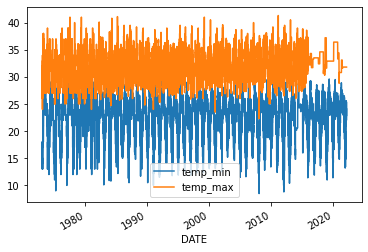

In [140]:
df1[["temp_min", "temp_max"]].plot()

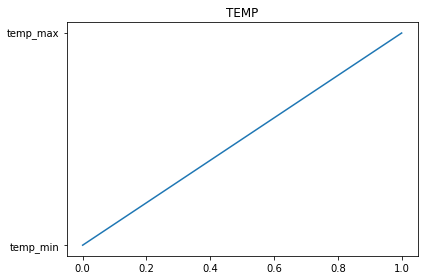

In [151]:
import matplotlib.pyplot as plt 
plt.plot(["temp_min" , "temp_max"])
plt.title('TEMP')
plt.tight_layout()

plt.show()

In [141]:
df1.index.year.value_counts().sort_index



<bound method Series.sort_index of 1996    366
2012    366
2000    366
1992    366
2004    366
2008    366
1984    366
2020    366
2016    366
2013    365
2011    365
2010    365
2014    365
1997    365
2015    365
2007    365
2006    365
2005    365
2003    365
2017    365
2002    365
2001    365
2018    365
2009    365
1998    365
1985    365
1986    365
1980    365
1982    365
1983    365
2019    365
1991    364
1999    364
1993    364
1981    364
1995    364
1979    364
1987    363
1994    363
1978    363
1989    362
2021    362
1977    361
1990    360
1974    360
1988    358
1976    351
1973    350
1975    350
2022     89
Name: DATE, dtype: int64>

In [142]:
df1["target"] = df1.shift(-1)["temp_max"]


In [143]:
df1


,precip,temp_min,temp_max,target
DATE,,,,
1973-01-01,0.0,NaN,NaN,NaN
1973-01-02,0.0,NaN,NaN,NaN
1973-01-03,0.0,NaN,NaN,NaN
1973-01-04,0.0,NaN,NaN,30.0
1973-01-05,0.0,18.0,30.0,30.0
...,...,...,...,...
2022-03-26,0.0,25.0,31.8,31.8
2022-03-27,0.0,24.0,31.8,31.8
2022-03-28,0.0,24.1,31.8,31.8


In [144]:
df1 = df.iloc[:-1,:].copy()

In [145]:
df1

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1973-01-01,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,22.8,NaN,NaN
1973-01-02,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,24.7,NaN,NaN
1973-01-03,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,24.0,NaN,NaN
1973-01-04,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,24.5,NaN,NaN
1973-01-05,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,26.0,30.0,18.0
...,...,...,...,...,...,...
2022-03-25,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,29.2,NaN,23.5
2022-03-26,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,28.9,NaN,25.0
2022-03-27,IN012070800,"BOMBAY SANTACRUZ, IN",NaN,29.0,NaN,24.0
